# Pectoral Muscle Removal

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import polygon

In [11]:
FILEPATH = "data/meta/1_staged/CBIS-DDSM/Calc-Training_P_01286_LEFT_MLO/08-07-2016-DDSM-09531/1.000000-full mammogram images-07689/1-1.png"

## Original Image

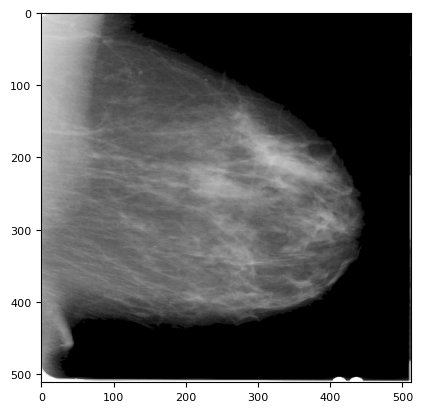

In [12]:
img = cv2.imread(FILEPATH)
plt.imshow(img)

## Canny Edge Detection

In [13]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

In [14]:
blurred = cv2.GaussianBlur(img, (5,5), 0)
edges = auto_canny(blurred)
edges.shape

(512, 512)

## Hough Line Transformation

In [15]:
def shortlist_lines(lines):
    MIN_ANGLE = 10
    MAX_ANGLE = 70
    MIN_DIST  = 5
    MAX_DIST  = 256
    shortlisted_lines = [x for x in lines if 
                          (x['rho']>=MIN_DIST) &
                          (x['rho']<=MAX_DIST) &
                          (x['theta']>=MIN_ANGLE) &
                          (x['theta']<=MAX_ANGLE)
                        ]
    return shortlisted_lines

In [16]:
lines = cv2.HoughLines(edges,1,np.pi/180,200)
line_list = []
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
 
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
 
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
 
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
    line_list.append({'rho': rho, 'theta': np.degrees(theta), 'point1': [x1,y1], 'point2': [x2,y2]})




line_list
shortlisted_lines = shortlist_lines(line_list)
shortlisted_lines

[{'rho': 1.0, 'theta': 0.0, 'point1': [1, 1000], 'point2': [1, -1000]},
 {'rho': 509.0, 'theta': 90.0, 'point1': [-1000, 508], 'point2': [999, 509]},
 {'rho': 509.0, 'theta': 0.0, 'point1': [509, 1000], 'point2': [509, -1000]}]

[]

## Remove Pectoral

In [17]:
def remove_pectoral(shortlisted_lines):
    shortlisted_lines.sort(key = lambda x: x['rho'])
    pectoral_line = shortlisted_lines[0]
    d = pectoral_line['rho']
    theta = np.radians(pectoral_line['theta'])
    x_intercept = d/np.cos(theta)
    y_intercept = d/np.sin(theta)
    rr, cc = polygon([0, 0, y_intercept], [0, x_intercept, 0])
    

In [18]:
rr,cc = remove_pectoral(shortlisted_lines=shortlisted_lines)


IndexError: list index out of range